C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\li

Confusion Matrix for Model 1:
[[ 5  2  0]
 [ 1 11  2]
 [ 0  0  0]]

Confusion Matrix for Model 2:
[[ 6  1  0]
 [ 1 12  1]
 [ 0  0  0]]

Metrics for Model 1:
Accuracy: 0.76
Precision: 0.84
Recall: 0.76
F1 Score: 0.80

Metrics for Model 2:
Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1 Score: 0.88


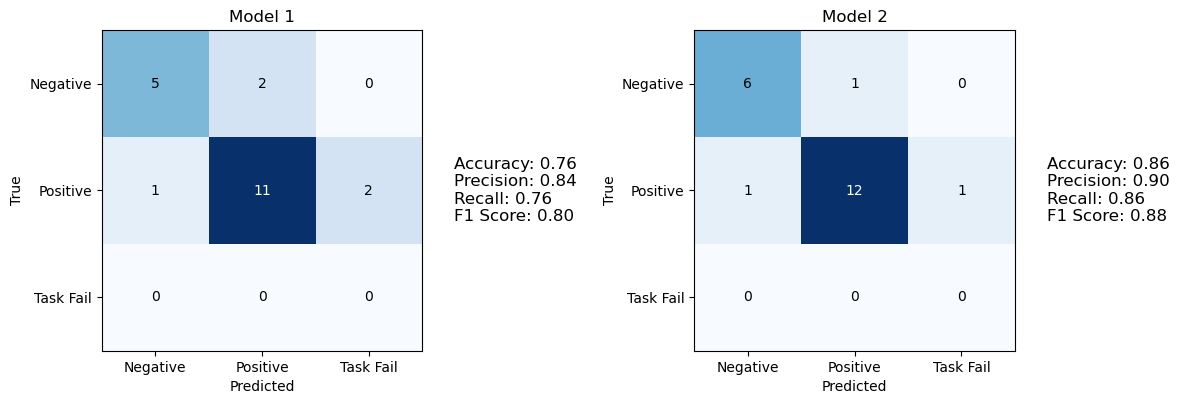

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import chardet

# Detect the encoding of the file
with open("output_data.csv", "rb") as f:
    result = chardet.detect(f.read())

# Read the data from the CSV file with the detected encoding
data = pd.read_csv("output_data.csv", encoding=result["encoding"])



# Get the ground truth and predictions for each model
ground_truth = data["Completion"]
model1_predictions = data["davinci:ft-personal-2023-04-04-13-27-35_completion"]
model2_predictions = data["curie:ft-personal-2023-04-04-11-58-59_completion"]

# Calculate confusion matrices
confusion_matrix1 = confusion_matrix(ground_truth, model1_predictions)
confusion_matrix2 = confusion_matrix(ground_truth, model2_predictions)

# Calculate metrics
report1 = classification_report(ground_truth, model1_predictions, output_dict=True)
report2 = classification_report(ground_truth, model2_predictions, output_dict=True)

# Print confusion matrices and metrics
print("Confusion Matrix for Model 1:")
print(confusion_matrix1)
print("\nConfusion Matrix for Model 2:")
print(confusion_matrix2)

print("\nMetrics for Model 1:")
print("Accuracy: {:.2f}".format(accuracy_score(ground_truth, model1_predictions)))
print("Precision: {:.2f}".format(report1['weighted avg']['precision']))
print("Recall: {:.2f}".format(report1['weighted avg']['recall']))
print("F1 Score: {:.2f}".format(report1['weighted avg']['f1-score']))

print("\nMetrics for Model 2:")
print("Accuracy: {:.2f}".format(accuracy_score(ground_truth, model2_predictions)))
print("Precision: {:.2f}".format(report2['weighted avg']['precision']))
print("Recall: {:.2f}".format(report2['weighted avg']['recall']))
print("F1 Score: {:.2f}".format(report2['weighted avg']['f1-score']))

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

metrics_list = [
    {
        "Accuracy": accuracy_score(ground_truth, model1_predictions),
        "Precision": report1['weighted avg']['precision'],
        "Recall": report1['weighted avg']['recall'],
        "F1 Score": report1['weighted avg']['f1-score']
    },
    {
        "Accuracy": accuracy_score(ground_truth, model2_predictions),
        "Precision": report2['weighted avg']['precision'],
        "Recall": report2['weighted avg']['recall'],
        "F1 Score": report2['weighted avg']['f1-score']
    }
]

for idx, (ax, cm, title, metrics) in enumerate(zip(axes, [confusion_matrix1, confusion_matrix2], ["Model 1", "Model 2"], metrics_list)):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    tick_marks = np.arange(3)
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_yticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

    # Display the values on the confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

    # Add metrics to the plot
    metrics_text = "\n".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
    ax.text(1.1, 0.5, metrics_text, fontsize=12, transform=ax.transAxes, verticalalignment="center")

fig.tight_layout()
plt.show()


C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\li


Metrics for text-davinci-003:
Accuracy: 0.77
Precision: 0.82
Recall: 0.77
F1 Score: 0.78

Metrics for text-curie-001:
Accuracy: 0.55
Precision: 0.86
Recall: 0.55
F1 Score: 0.63

Metrics for text-babbage-001:
Accuracy: 0.41
Precision: 0.81
Recall: 0.41
F1 Score: 0.45

Metrics for text-ada-001:
Accuracy: 0.50
Precision: 0.54
Recall: 0.50
F1 Score: 0.52

Metrics for davinci:ft-personal-2023-04-04-13-27-35:
Accuracy: 0.77
Precision: 0.87
Recall: 0.77
F1 Score: 0.78

Metrics for curie:ft-personal-2023-04-04-11-58-59:
Accuracy: 0.91
Precision: 0.95
Recall: 0.91
F1 Score: 0.93


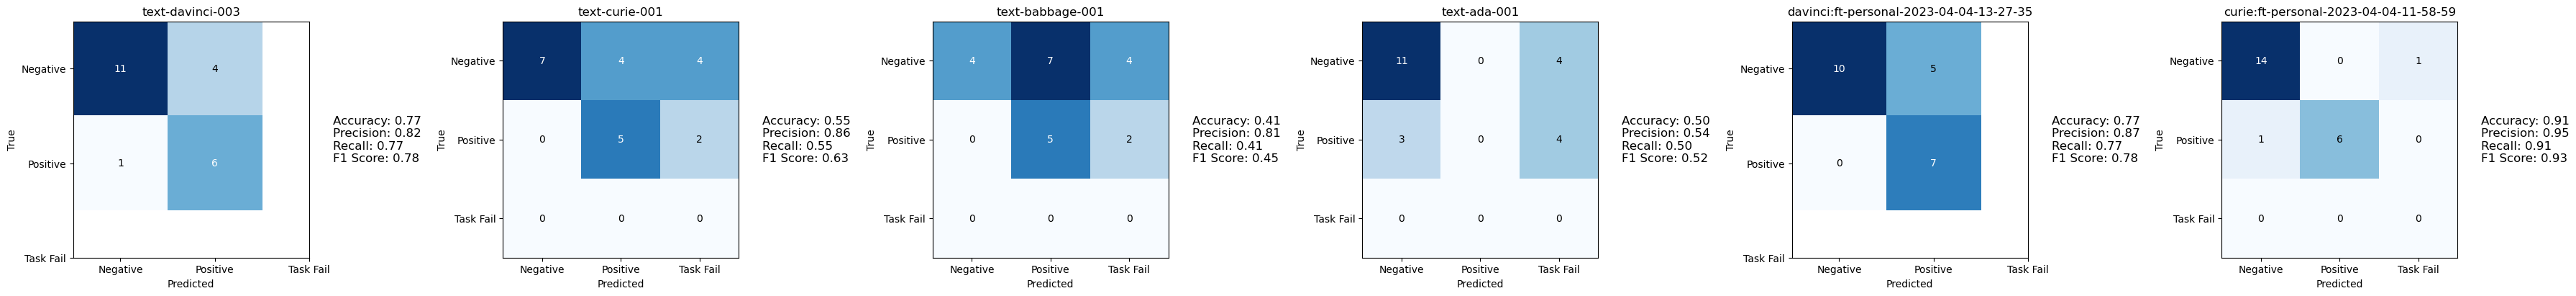

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import chardet

# Detect the encoding of the file
with open("Model_test_2_with_completions.csv", "rb") as f:
    result = chardet.detect(f.read())

# Read the data from the CSV file with the detected encoding
data = pd.read_csv("Model_test_2_with_completions.csv", encoding=result["encoding"])

# Get the ground truth and predictions for each model
ground_truth = data["True value"]

models = [
    "text-davinci-003",
    "text-curie-001",
    "text-babbage-001",
    "text-ada-001",
    "davinci:ft-personal-2023-04-04-13-27-35",
    "curie:ft-personal-2023-04-04-11-58-59"
]

# Calculate confusion matrices and metrics for each model
confusion_matrices = []
metrics_list = []
for model in models:
    predictions = data[model]
    cm = confusion_matrix(ground_truth, predictions)
    report = classification_report(ground_truth, predictions, output_dict=True)
    accuracy = accuracy_score(ground_truth, predictions)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    confusion_matrices.append(cm)
    metrics_list.append({"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score})

# Print metrics for each model
for i, model in enumerate(models):
    print(f"\nMetrics for {model}:")
    for key, value in metrics_list[i].items():
        print(f"{key}: {value:.2f}")

# Plot confusion matrices
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 6))
axes = axes.flatten()

for idx, (ax, cm, title, metrics) in enumerate(zip(axes, confusion_matrices, models, metrics_list)):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    tick_marks = np.arange(3)
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_yticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

    # Display the values on the confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

    # Add metrics to the plot
    metrics_text = "\n".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
    ax.text(1.1, 0.5, metrics_text, fontsize=12, transform=ax.transAxes, verticalalignment="center")

fig.tight_layout()
plt.show()



Metrics for davinci:ft-personal-2023-04-04-13-27-35:
Accuracy: 0.76
Precision: 0.84
Recall: 0.76
F1 Score: 0.80

Metrics for curie:ft-personal-2023-04-04-11-58-59:
Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1 Score: 0.88


C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuxi\anaconda3\envs\General\li

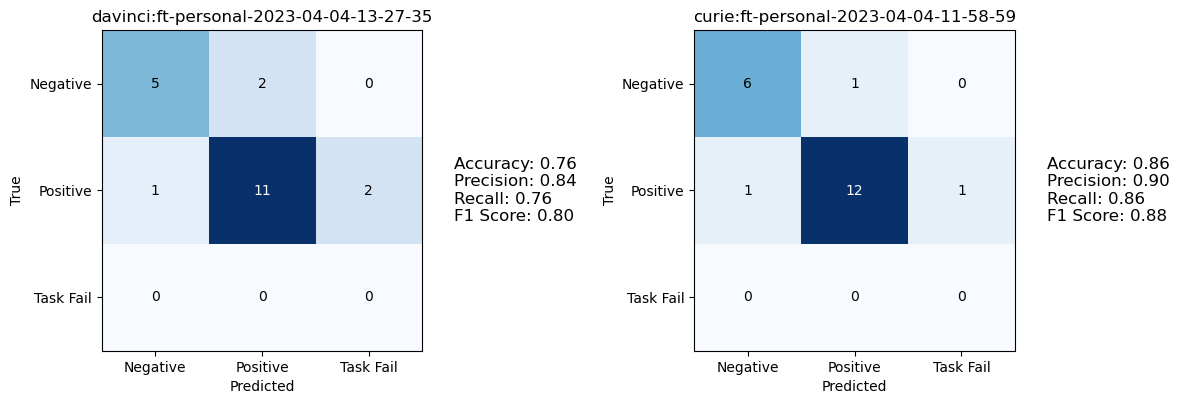

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import chardet

# Detect the encoding of the file
with open("output_data.csv", "rb") as f:
    result = chardet.detect(f.read())

# Read the data from the CSV file with the detected encoding
data = pd.read_csv("output_data.csv", encoding=result["encoding"])

# Get the ground truth and predictions for each model
ground_truth = data["True value"]

models = [
    "davinci:ft-personal-2023-04-04-13-27-35",
    "curie:ft-personal-2023-04-04-11-58-59"
]

# Calculate confusion matrices and metrics for each model
confusion_matrices = []
metrics_list = []
for model in models:
    predictions = data[model]
    cm = confusion_matrix(ground_truth, predictions)
    report = classification_report(ground_truth, predictions, output_dict=True)
    accuracy = accuracy_score(ground_truth, predictions)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    confusion_matrices.append(cm)
    metrics_list.append({"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score})

# Print metrics for each model
for i, model in enumerate(models):
    print(f"\nMetrics for {model}:")
    for key, value in metrics_list[i].items():
        print(f"{key}: {value:.2f}")

# Plot confusion matrices
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 6))
axes = axes.flatten()

for idx, (ax, cm, title, metrics) in enumerate(zip(axes, confusion_matrices, models, metrics_list)):
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(title)
    tick_marks = np.arange(3)
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_yticklabels(["Negative", "Positive", "Task Fail"])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

    # Display the values on the confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

    # Add metrics to the plot
    metrics_text = "\n".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
    ax.text(1.1, 0.5, metrics_text, fontsize=12, transform=ax.transAxes, verticalalignment="center")

fig.tight_layout()
plt.show()
